## Converting binary to csv

In [ ]:
from load_data import convert_raw_to_csv 

folder_path = 'datasets/raw/new/'
time_scale = 's'
voltage_scale = 'uV'
save_path = 'csv_2/'

convert_raw_to_csv(folder_path, time_scale, voltage_scale, save_path)

## Loading physionet data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Utils import get_eeg_data_segmented, load_and_concat_ssvep_datasets
path = "datasets/numpy_testing/processed_eeg_data_3_7_11_v2.npz"
print(f"Loading data from: {path}")
data = np.load(path)
X_all, y_all = data["X"], data["y"]
print(f"Data loaded: X={X_all.shape}, y={y_all.shape}")

Loading data from: datasets/numpy_testing/processed_eeg_data_3_7_11_v2.npz
Data loaded: X=(9464, 64, 480), y=(9464,)


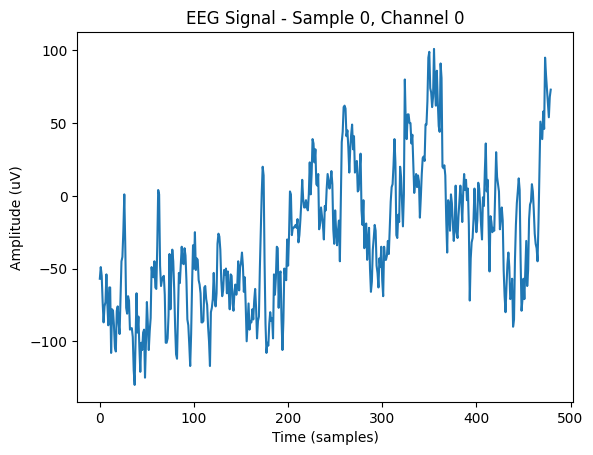

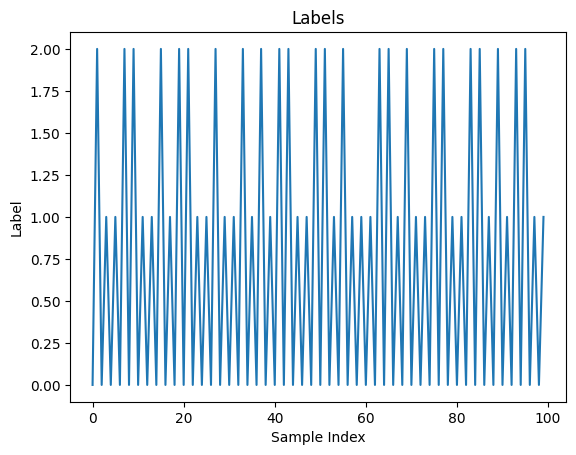

In [4]:
plt.plot(X_all[0, 0, :])
plt.title(f"EEG Signal - Sample 0, Channel 0")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (uV)")
plt.show()

plt.plot(y_all[:100])
plt.title("Labels")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.show()

In [1]:
import numpy as np

path = "datasets/numpy_testing/processed_eeg_data_3_7_11_v2.npz"
print(f"Loading data from: {path}")

data = np.load(path)
X_all, y_all = data["X"], data["y"]

print(f"Data loaded: X={X_all.shape}, y={y_all.shape}")

# ---------------------------------------------------------------
# TAKE FIRST 5%
# ---------------------------------------------------------------
fraction = 0.05  # 5%
n_total = len(X_all)
n_cut = int(n_total * fraction)

print(f"Keeping first {n_cut} samples out of {n_total} ({fraction*100:.0f}%).")

X_small = X_all[:n_cut].astype(np.float32)   # ensure FP32
y_small = y_all[:n_cut].astype(np.int64)

print(f"New shapes: X_small={X_small.shape}, y_small={y_small.shape}")

# ---------------------------------------------------------------
# SAVE TO NEW NPZ
# ---------------------------------------------------------------
out_path = "datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz"
np.savez(out_path, X=X_small, y=y_small)

print(f"Saved reduced dataset to: {out_path}")


Loading data from: datasets/numpy_testing/processed_eeg_data_3_7_11_v2.npz
Data loaded: X=(9464, 64, 480), y=(9464,)
Keeping first 473 samples out of 9464 (5%).
New shapes: X_small=(473, 64, 480), y_small=(473,)
Saved reduced dataset to: datasets/numpy_testing/processed_eeg_data_3_7_11_v2_SMALL5.npz


##  Loading csv files to check for formating and to figure out slicing 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Utils import get_eeg_data_segmented, load_and_concat_ssvep_datasets


# file_path = "datasets/csv/Data_20251031_101158_1.csv"
# EEG_SLICE = slice(10000, 170000)
# file_path = "datasets/csv/Data_20251031_103417_2.csv"
# EEG_SLICE = slice(16000, 160000)
# file_path = "datasets/csv/Data_20251031_105214_3.csv"
# EEG_SLICE = slice(0, 20000000)
# EEG_SLICE = slice(5000, 160000)
# file_path = "datasets/csv/Data_20251031_111742_4.csv"
# EEG_SLICE = slice(5000, 150000)
# file_path = "datasets/csv/Data_20251107_110538_georg.csv"
# EEG_SLICE = slice(25000, 212500) # cut 157000:160000
# EEG_SLICE = slice(0, -1) # cut 157000:160000
# file_path = "datasets/csv/Data_20251107_111659_georg.csv"
# EEG_SLICE = slice(14000, 195000)

# file_path = "datasets/csv/Data_20251114_113727_georg.csv"
# EEG_SLICE = slice(10000, 240000)
file_path = "datasets/csv/Data_20251114_115127_abhinav.csv"
EEG_SLICE = slice(100000, 370000)


# Use your integrated function
X, y, eeg, trigger = get_eeg_data_segmented(
    csv_path=file_path,
    sample_rate=500,
    window_size=1.0,
    overlap=0.5,
    data_slice=EEG_SLICE,
    filter=False
)

# plt.figure(figsize=(10,4))
# plt.plot(X[:, 2, :])  # 27th window, first channel, all 500 samples 
# plt.show()

plt.figure(figsize=(10,4))
plt.plot(eeg[3,:])  # first channel
plt.show()

plt.figure(figsize=(10,4))
plt.plot(trigger[:])
plt.show()


## Load SSVEP Data from csv list with slices, concat and then save as .npz

In [3]:
# ============================================================
# 1. Imports
# ============================================================
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Utils import get_eeg_data_segmented, load_and_concat_ssvep_datasets, downsample_label

# all frequiencies sorted = [5, 7, 8.6, 10.5, 11, 12, 13.4, 15.2, 17, 18.1]
#                         = [0, 1,   2,    3,  4,  5,    6,    7,  8,    9]

datasets = [ # for 10 Frequencies
    ("datasets/csv/Data_20251031_101158_1.csv", slice(10000, 170000),        {0:0, 1:1, 2:3, 3:5, 4:7, 5:9}), 
    ("datasets/csv/Data_20251031_103417_2.csv", slice(16000, 160000),        {0:0, 1:1, 2:3, 3:5, 4:7, 5:9}),
    # ("datasets/csv/Data_20251031_105214_3.csv", slice(5000,  160000)), 
    ("datasets/csv/Data_20251031_111742_4.csv", slice(5000,  150000),        {0:0, 1:1, 2:3, 3:5, 4:7, 5:9}), 
    ("datasets/csv/Data_20251114_113727_georg.csv", slice(10000, 240000),    {0:0, 1:1, 2:3, 3:5, 4:7, 5:9}), 
    ("datasets/csv/Data_20251114_115127_abhinav.csv", slice(100000, 370000), {0:0, 1:1, 2:3, 3:5, 4:7, 5:9}), 
    ("datasets/csv/Data_20251107_110538_georg.csv", slice(25000, 212500), {0:0, 1:0, 2:2, 3:4, 4:6, 5:8}),
    ("datasets/csv/Data_20251107_111659_georg.csv", slice(14000, 195000), {0:0, 1:0, 2:2, 3:4, 4:6, 5:8}),
]

# datasets = [
#     ("datasets/csv/Data_20251031_101158_1.csv", slice(10000, 170000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}), 
#     ("datasets/csv/Data_20251031_103417_2.csv", slice(16000, 160000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}),
#     ("datasets/csv/Data_20251031_105214_3.csv", slice(5000,  160000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}), 
#     ("datasets/csv/Data_20251031_111742_4.csv", slice(5000,  150000), {0: 0, 1: 2, 2: 4, 3: 6, 4: 8, 5: 10}), 
#     # ("datasets/csv/Data_20251107_110538_georg.csv", slice(25000, 212500), {0: 0, 1: 1, 2: 3, 3: 5, 4: 7, 5: 9}),
#     # ("datasets/csv/Data_20251107_111659_georg.csv", slice(14000, 195000), {0: 0, 1: 1, 2: 3, 3: 5, 4: 7, 5: 9}),
# ]
# datasets = [
#     ("datasets/csv/Data_20251031_101158_1.csv", slice(10000, 170000), {2:0, 3:1, 4:2, 5:3}), 
#     ("datasets/csv/Data_20251031_103417_2.csv", slice(16000, 160000), {2:0, 3:1, 4:2, 5:3}),
#     # ("datasets/csv/Data_20251031_105214_3.csv", slice(5000,  160000), {2:0, 3:1, 4:2, 5:3}), 
#     ("datasets/csv/Data_20251031_111742_4.csv", slice(5000,  150000), {2:0, 3:1, 4:2, 5:3}), 
#     ("datasets/csv/Data_20251114_113727_georg.csv", slice(10000, 240000), {2:0, 3:1, 4:2, 5:3}), 
#     ("datasets/csv/Data_20251114_115127_abhinav.csv", slice(100000, 370000), {2:0, 3:1, 4:2, 5:3}), 
# ]
# datasets = [
#     ("datasets/csv/Data_20251031_101158_1.csv", slice(10000, 170000)), 
#     ("datasets/csv/Data_20251031_103417_2.csv", slice(16000, 160000)),
#     # ("datasets/csv/Data_20251031_105214_3.csv", slice(5000,  160000)), 
#     ("datasets/csv/Data_20251031_111742_4.csv", slice(5000,  150000)), 
#     ("datasets/csv/Data_20251114_113727_georg.csv", slice(10000, 240000)), 
#     ("datasets/csv/Data_20251114_115127_abhinav.csv", slice(100000, 370000)), 
# ]



X_all, y_all, X_bal, y_bal, eeg_all, trigger_all = load_and_concat_ssvep_datasets(
    datasets=datasets, 
    sample_rate=250, # Hz500
    window_size=1.5, # 1.0
    overlap=0.5,
    verbose=True,
    filter=False,
    remove_labels=[0], # [1]
    # relabel_map = {0:0, 2:1, 3:2, 4:3, 5:4},
    # target_label=0,
    # keep_ratio=0.8,
)


# np.savez_compressed("ssvep_5_nofilter_GMCGA_no1_5labels.npz", X=X_bal, y=y_bal)
# np.savez_compressed("ssvep_5_nofilter_GMCGA_no1_5labels_250hz_1.5_window_size_0.8keepratio.npz", X=X_bal, y=y_bal)
np.savez_compressed("ssvep_10_nofilter_GMCGAGG_10labels_250hz_1.5_window_size.npz", X=X_bal, y=y_bal)



=== Loading 7 EEG files ===

[1/7] Processing datasets/csv/Data_20251031_101158_1.csv
   → Using slice 10000:170000
   → Applying custom mapping: {0: 0, 1: 1, 2: 3, 3: 5, 4: 7, 5: 9}
Loaded: EEG shape (8, 176659), Trigger shape (176659,)
After slicing: EEG shape (8, 160000), Trigger shape (160000,)

Window length: 375 samples (1.5s), Step: 187 samples

=== Detected contiguous regions (label, start, end, length) ===
Label 0      | Start: 0      | End: 20692  | Len: 20692
Label 5      | Start: 20692  | End: 23199  | Len: 2507
Label 0      | Start: 23199  | End: 31886  | Len: 8687
Label 5      | Start: 31886  | End: 34394  | Len: 2508
Label 0      | Start: 34394  | End: 41550  | Len: 7156
Label 5      | Start: 41550  | End: 44057  | Len: 2507
Label 0      | Start: 44057  | End: 51124  | Len: 7067
Label 3      | Start: 51124  | End: 53607  | Len: 2483
Label 0      | Start: 53607  | End: 60155  | Len: 6548
Label 1      | Start: 60155  | End: 62664  | Len: 2509
Label 0      | Start: 62664  

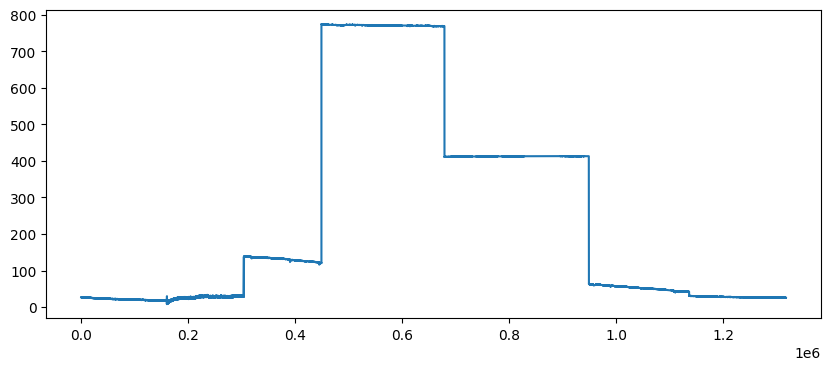

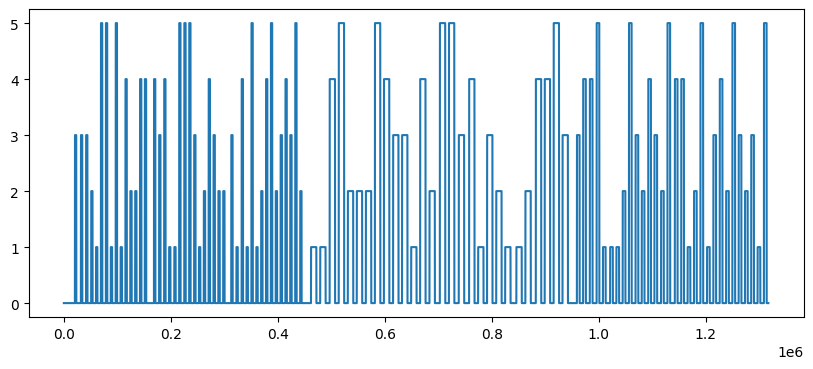

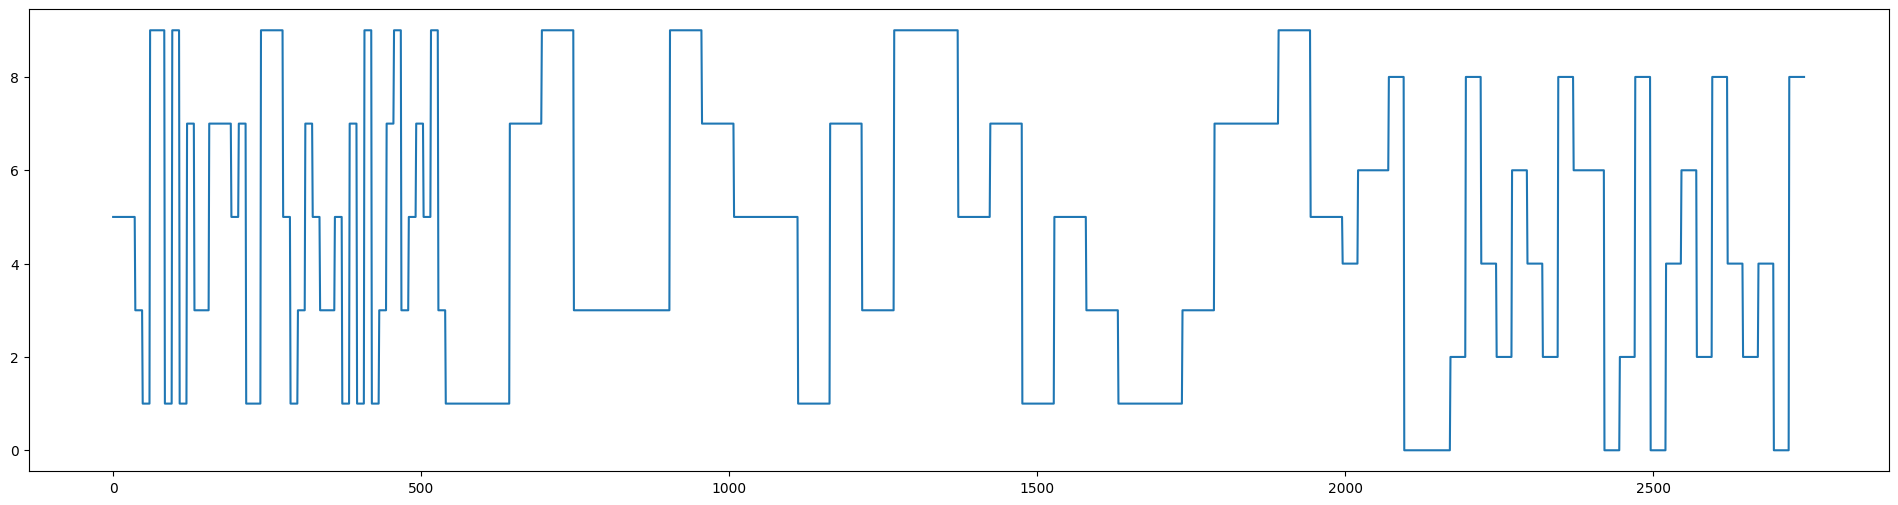

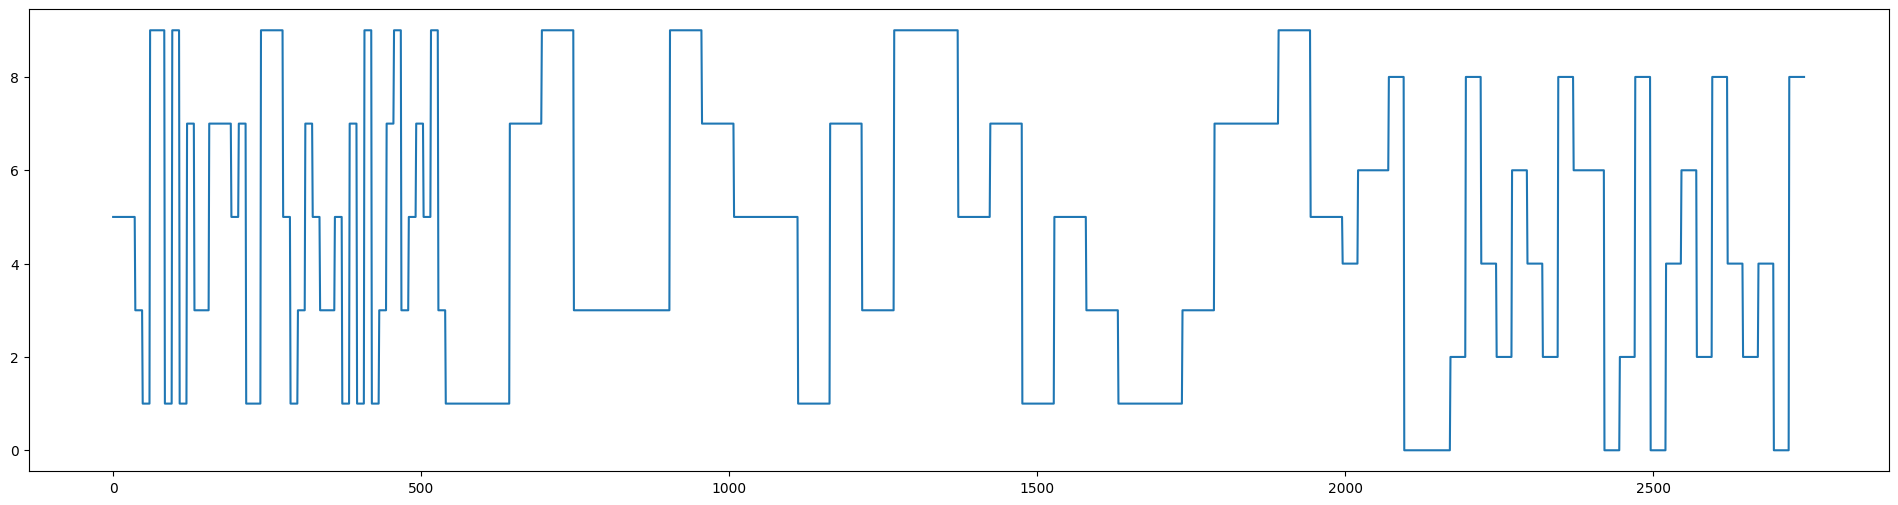

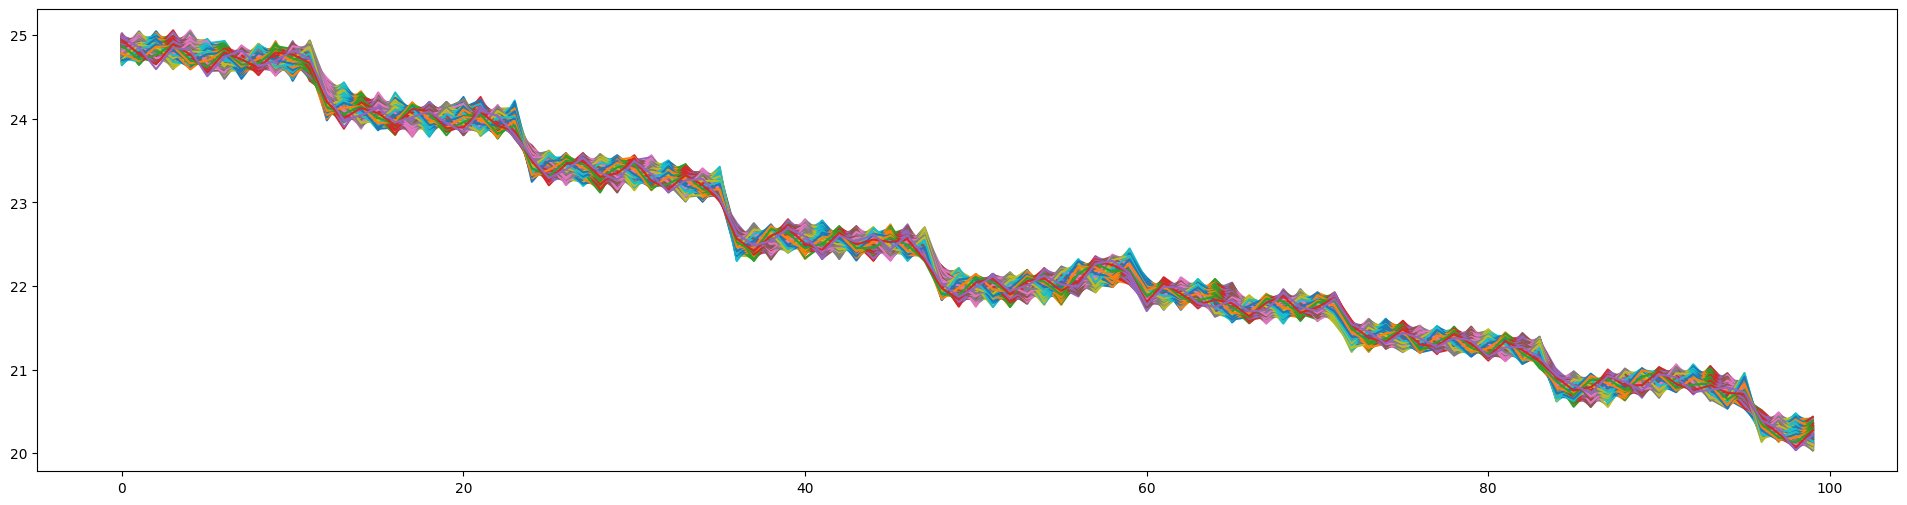

In [5]:
# data = np.load("datasets/numpy/ssvep_5_nofilter.npz")
# data = np.load("datasets/numpy/ssvep_5_filter.npz")
# data = np.load("datasets/numpy/ssvep_10_nofilter_GSGG.npz")
# data = np.load("datasets/numpy/ssvep_10_filter_GSGG.npz")
# X_all = data["X"]
# y_all = data["y"]

plt.figure(figsize=(10,4))
plt.plot(eeg_all[0,:])  # first channel
plt.show()

plt.figure(figsize=(10,4))
plt.plot(trigger_all)
plt.show()

plt.figure(figsize=(24,6))
plt.plot(y_all)
plt.show()

plt.figure(figsize=(24,6))
plt.plot(y_bal)
plt.show()

plt.figure(figsize=(24,6))
plt.plot(X_all[0:100, 0, :])  # first window, first channel
plt.show()